# Time Series experiments

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
#sns.set(sytle="darkgrid")
# use grid layout functions. 
import matplotlib.gridspec as gridspec
# a bunch of ueful functions for plotting data https://matplotlib.org/stable/api/mlab_api.html
import matplotlib.mlab as mlab

# Here is the body of the code, example of using markdown

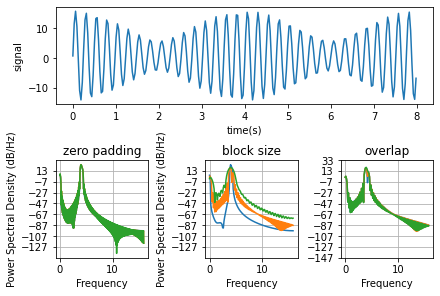

In [6]:
#
# Matplotlib examples: https://pythonguides.com/matplotlib-plot-numpy-array/
# In this example we will make a figure with 2 panes.
# some examples can be found here: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/psd_demo.html#sphx-glr-gallery-lines-bars-and-markers-psd-demo-py
#
# Make two side by side frames on a single figure and have the time series and PSD 
# right after. 
#
dt = np.pi/100.0         # set time step.
fs = 1.0/dt
t  = np.arange(0,8,dt)  # give me a set of time points with spacing dt. 
y  = 10.0 * np.sin(2.0*np.pi * 4.0 * t) + 5.0*np.sin(2.0*np.pi*4.25*t)
# add in some noise. Use the random function, and make it the shape of the array t. 
y = y + np.random.randn(len(t.shape))

# plot the raw time series, First setup the grid for the drawing canvas. Divided 2 x 3
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(2,3,figure=fig)
# Plot the time series in the upper row, span all columns
ax = fig.add_subplot(gs[0, :])
ax.plot(t,y)
ax.set_xlabel('time(s)')
ax.set_ylabel('signal')

# Plot the PSd with different amounts of zero padding. This uses the 
# entire time series at once. 
ax2 = fig.add_subplot(gs[1,0])
ax2.psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
ax2.psd(y, NFFT=len(t), pad_to=len(t) * 2, Fs=fs)
ax2.psd(y, NFFT=len(t), pad_to=len(t) * 4, Fs=fs)
ax2.set_title('zero padding')

# Plot the PSE with different block sizes, Zero to pad the length of the 
# original data sequence
ax3 = fig.add_subplot(gs[1, 1], sharex=ax2, sharey=ax2)
ax3.psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
ax3.psd(y, NFFT=len(t) // 2, pad_to=len(t), Fs=fs)
ax3.psd(y, NFFT=len(t) // 4, pad_to=len(t), Fs=fs)
ax3.set_title('block size')

#Plot the PSD with different amounts of overlap between blocks. 
#
ax4 = fig.add_subplot(gs[1,2], sharex=ax2, sharey=ax2)
ax4.psd(y, NFFT=len(t) // 2, pad_to=len(t), noverlap=0, Fs=fs)
ax4.psd(y, NFFT=len(t) // 2, pad_to=len(t), noverlap=int(0.05 * len(t)/2.), Fs=fs)
ax4.psd(y, NFFT=len(t) // 2, pad_to=len(t), noverlap=int(0.2 * len(t)/2.), Fs=fs)
ax4.set_ylabel('')
ax4.set_title('overlap')

plt.show()